# Objective : Iris Flowers Classification

# Exploratory Data Analysis (EDA) - Python

# Insights - Patterns

# Classification (Using the ML)


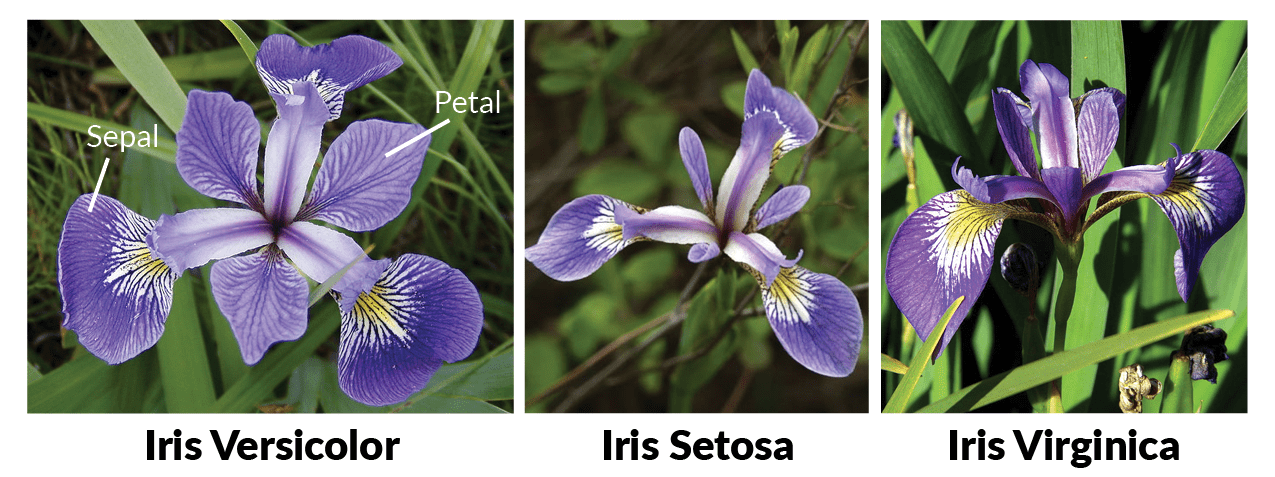

# 1. Load Python Modules

In [20]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 2. Read the Dataset from CSV file  - Using Pandas

In [21]:
file_path=r"iris_dataset.csv"
iris_df=pd.read_csv(file_path)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [22]:
#rename the columns names
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_labels','species']

# 3. Basic Inspection on given dataset


In [23]:
def basic_inspection_dataset(table):
    print("Top 5 Records of dataset")
    print(table.head())
    print()
        
    print("Bottom Records of dataset")
    print(table.tail())
    print()
    
    print("Column/features/Variable  - Names of Given dataset")
    print(table.columns)
    print()
    
    print("Shape(rows x columns) - of Given dataset")
    print(table.shape)
    print()
    
    print("Data types - Given Column Names")
    print(table.dtypes)
    print()
    
    print("Summry of dataset")
    print(table.info())
    print()
    
    print("To see the count of null/nan values in columns of dataset")
    print(table.isnull().value_counts())
    print()
    
    print("Dataset Summary ")
    print(table.describe())
    print()
    
basic_inspection_dataset(iris_df)

Top 5 Records of dataset
   sepal_length  sepal_width  petal_length  petal_width  species_labels  \
0           5.1          3.5           1.4          0.2               0   
1           4.9          3.0           1.4          0.2               0   
2           4.7          3.2           1.3          0.2               0   
3           4.6          3.1           1.5          0.2               0   
4           5.0          3.6           1.4          0.2               0   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Bottom Records of dataset
     sepal_length  sepal_width  petal_length  petal_width  species_labels  \
145           6.7          3.0           5.2          2.3               2   
146           6.3          2.5           5.0          1.9               2   
147           6.5          3.0           5.2          2.0               2   
148           6.2          3.4           5.4          2.3               2   
149           5.9          3.0          

## Observations on Iris Dataset

1. **Dataset Overview**
   - Number of Records: 150
   - Features/Variables: 5
   - Independent Features/Variables: sepal_length, sepal_width, petal_length, petal_width (Numerical/Continuous)
   - Dependent Feature/Variable: species (Categorical)

2. **Data Integrity**
   - No missing values are observed in any of the columns.

3. **Data Types**
   - Independent features' data types: float/Real numbers
   - Output variable: Categorical Variable

4. **Summary Statistics**
   - **sepal_length**: min: 4.3, 25%: 5.1, mean: 5.8, 50%: 5.8, 75%: 6.4, max: 7.9, 
   - **sepal_width**: min: 2.0, 25%: 2.8, mean: 3.1, 50%: 3.0, 75%: 3.3, max: 4.4, 
   - **petal_length**: min: 1.0, 25%: 1.6, mean: 3.8, 50%: 4.3, 75%: 5.1, max: 6.9, 
   - **petal_width**: min: 0.1, 25%: 0.3, mean: 1.2, 50%: 1.3, 75%: 1.8, max: 2.5, 

5. **Observations on Spread and Range**
   - The spread is more pronounced in petal_length.
   - The range is broader in petal_length compared to other features.

6. **Lowest Mean/Median**
   - The lowest mean and median are observed in petal_width.

7. **Petal Width Distribution**
   - The range (25% - 75%) for petal_width is between 0.3 to 1.8 cm, with a median of 1.3 cm.

8. **Petal Length Distribution**
   - The range (25% - 75%) for petal_length is between 1.6 to 5.1 cm, with a median of 4.3 cm.

9. **Sepal Width Distribution**
   - The range (25% - 75%) for sepal_width is between 2.8 to 3.3 cm, with a median of 3.0 cm.

10. **Sepal Length Distribution**
    - The range (25% - 75%) for sepal_length is between 5.1 to 6.4 cm, with a median of 5.8 cm.


# 4. Handling Missing Values - Cat - Variables

In [24]:
iris_df.isnull().sum()

sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_labels    0
species           0
dtype: int64

# 5. Categorical- UniVariable - Analysis -Using Pipeline

In [25]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
        

species frequency table
+---+------------+-----------+
|   |   Class    | Frequency |
+---+------------+-----------+
| 0 |   setosa   |    50     |
| 1 | versicolor |    50     |
| 2 | virginica  |    50     |
+---+------------+-----------+
species Relative frequency table
+---+------------+-----------+----------------------+
|   |   Class    | Frequency | Relative Frequency % |
+---+------------+-----------+----------------------+
| 0 |   setosa   |    50     |        33.33         |
| 1 | versicolor |    50     |        33.33         |
| 2 | virginica  |    50     |        33.33         |
+---+------------+-----------+----------------------+


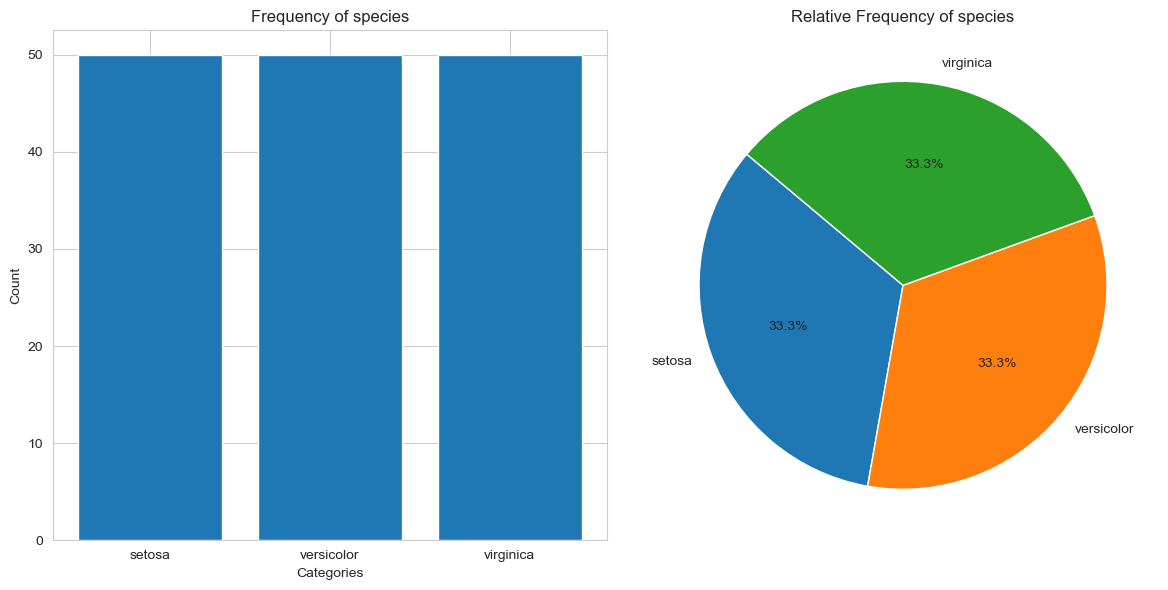

In [26]:
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(iris_df)

# 6. Handling Missing Values in Numerical Columns

In [27]:
iris_df.isnull().sum()

sepal_length      0
sepal_width       0
petal_length      0
petal_width       0
species_labels    0
species           0
dtype: int64

In [28]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_labels
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# 7. Numerical - UniVariable - Analysis - Using -Pipeline

In [29]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
           
            
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var],  color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()       
        

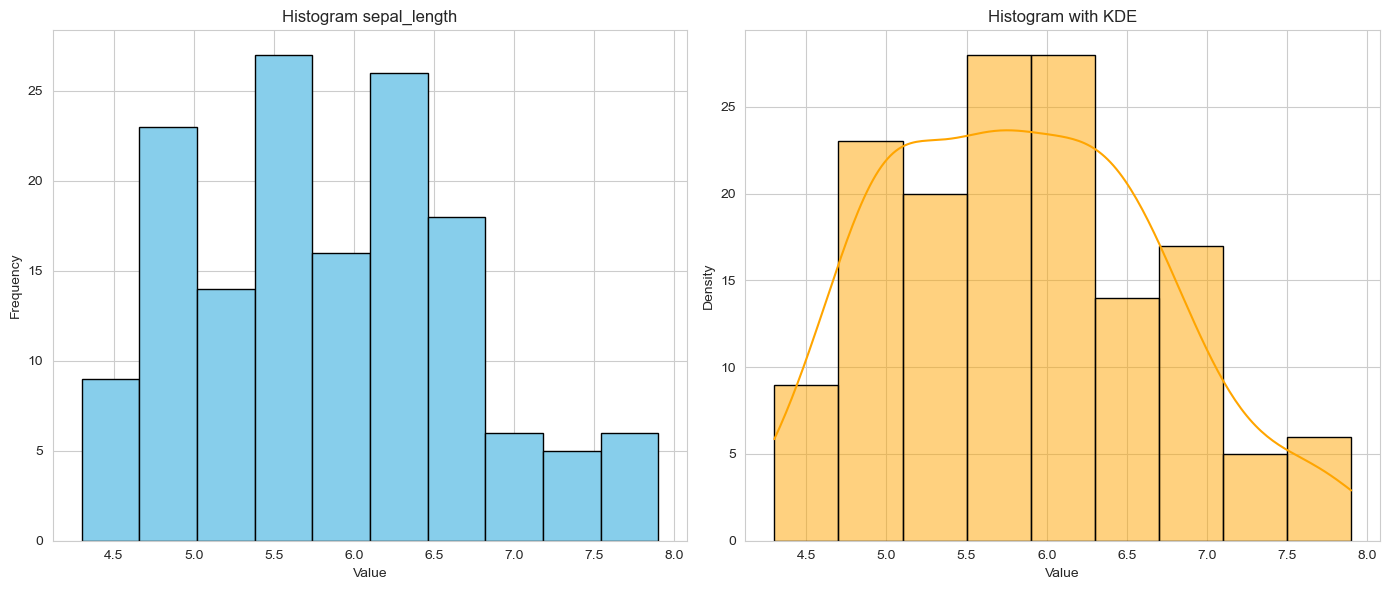

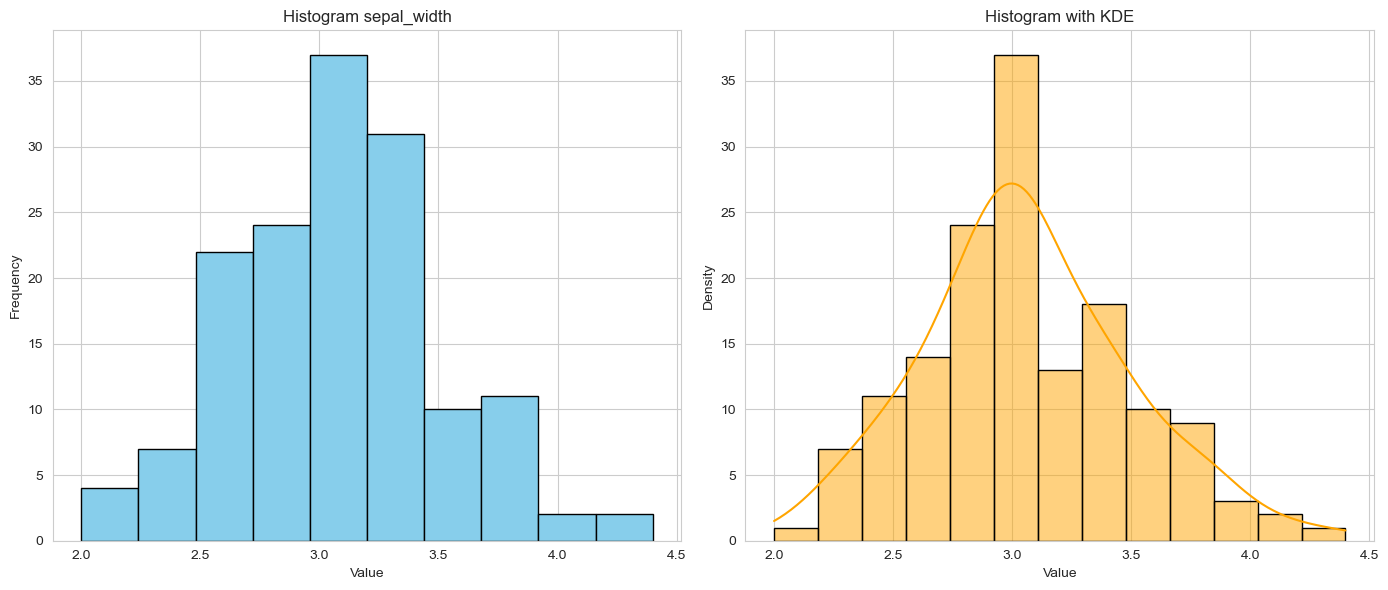

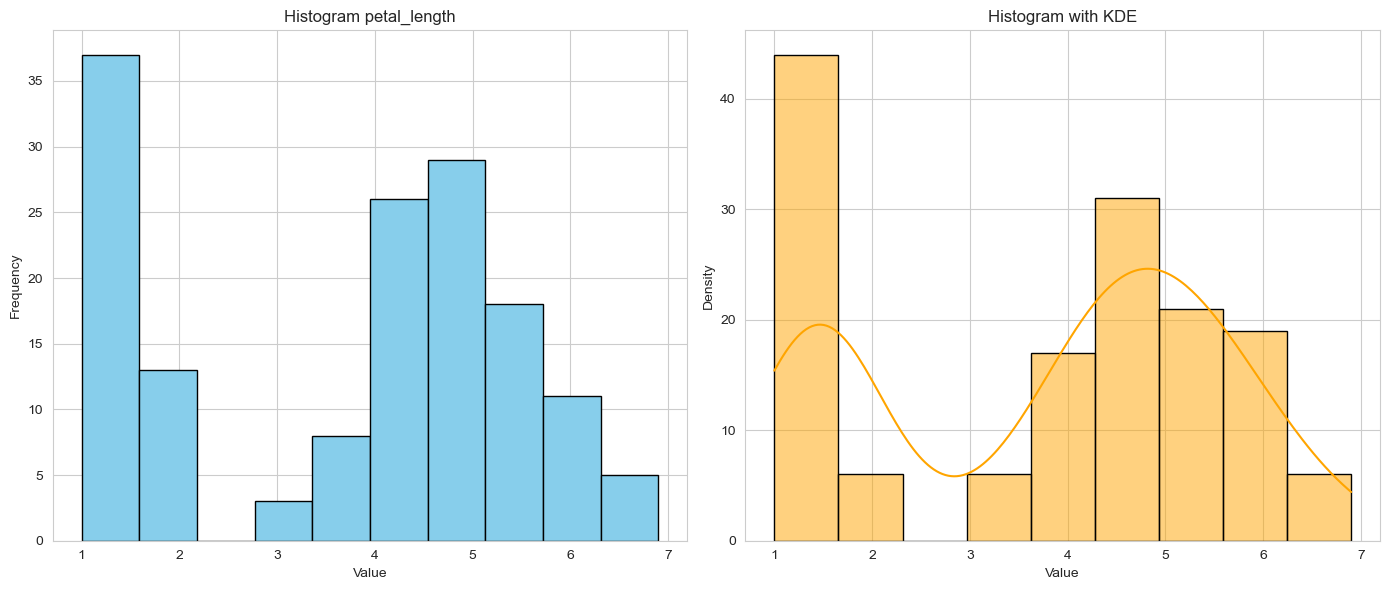

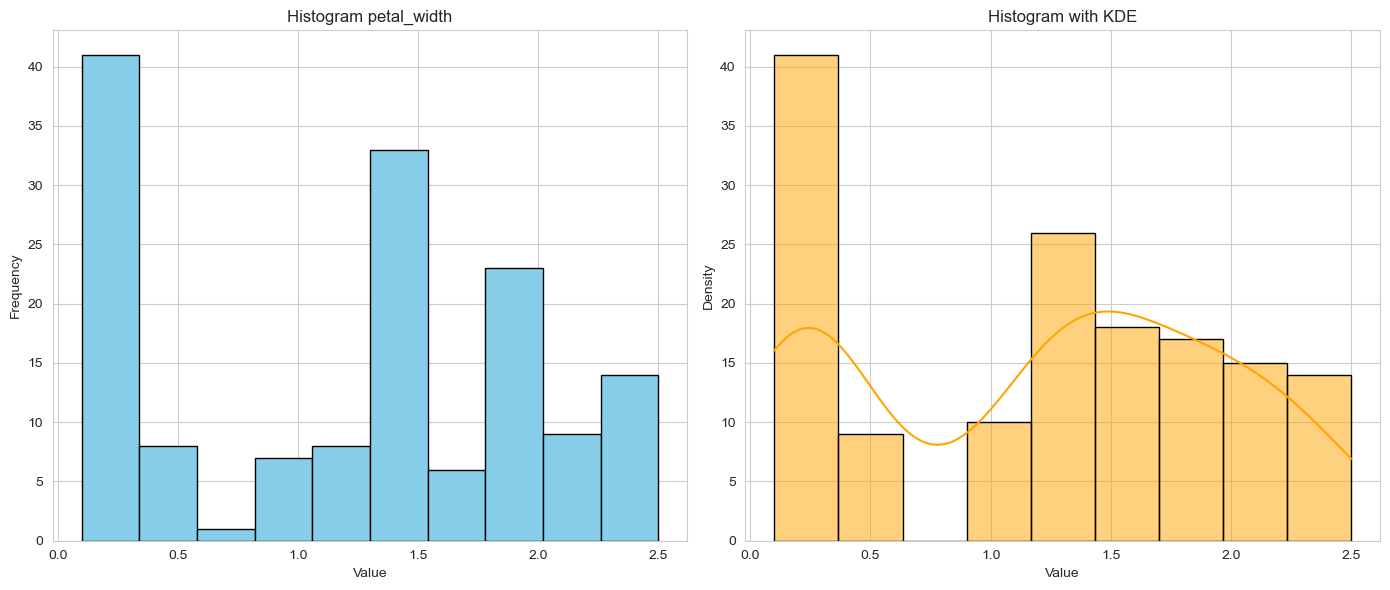

In [30]:

pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

iris_num_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()
# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(iris_num_df)

# 8. Numerical - Variables -Outliers Analysis

# 9. Bi Variate Analysis

## 9.1 Num Vs cat(target)

In [31]:
output_var='species'

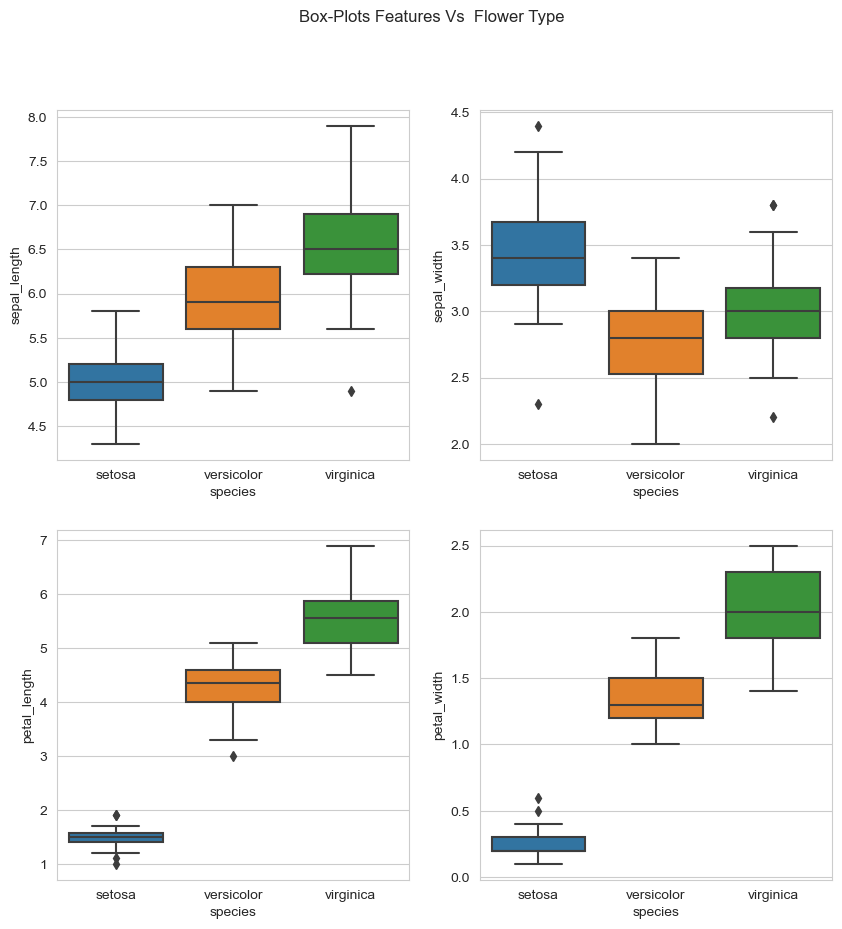

In [32]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Box-Plots Features Vs  Flower Type')
sns.boxplot(ax=axes[0, 0], x=output_var, y='sepal_length', data=iris_df)
sns.boxplot(ax=axes[0, 1], x=output_var, y='sepal_width', data=iris_df)
sns.boxplot(ax=axes[1, 0], x=output_var, y='petal_length', data=iris_df)
sns.boxplot(ax=axes[1, 1], x=output_var, y='petal_width', data=iris_df)
plt.show()

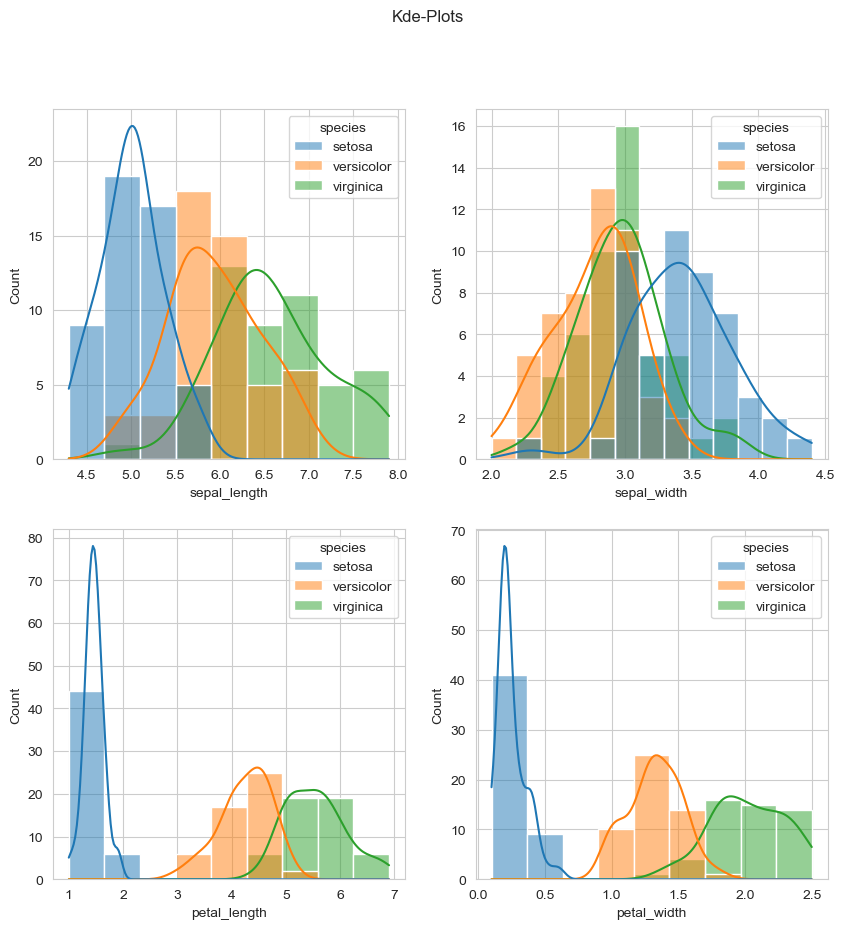

In [33]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Kde-Plots')
sns.histplot(ax=axes[0, 0], hue=output_var, x='sepal_length', data=iris_df,kde=True)
sns.histplot(ax=axes[0, 1], hue=output_var, x='sepal_width', data=iris_df,kde=True)
sns.histplot(ax=axes[1, 0], hue=output_var, x='petal_length', data=iris_df,kde=True)
sns.histplot(ax=axes[1, 1], hue=output_var, x='petal_width', data=iris_df,kde=True)
plt.show()

## 9.2 Num Vs Num

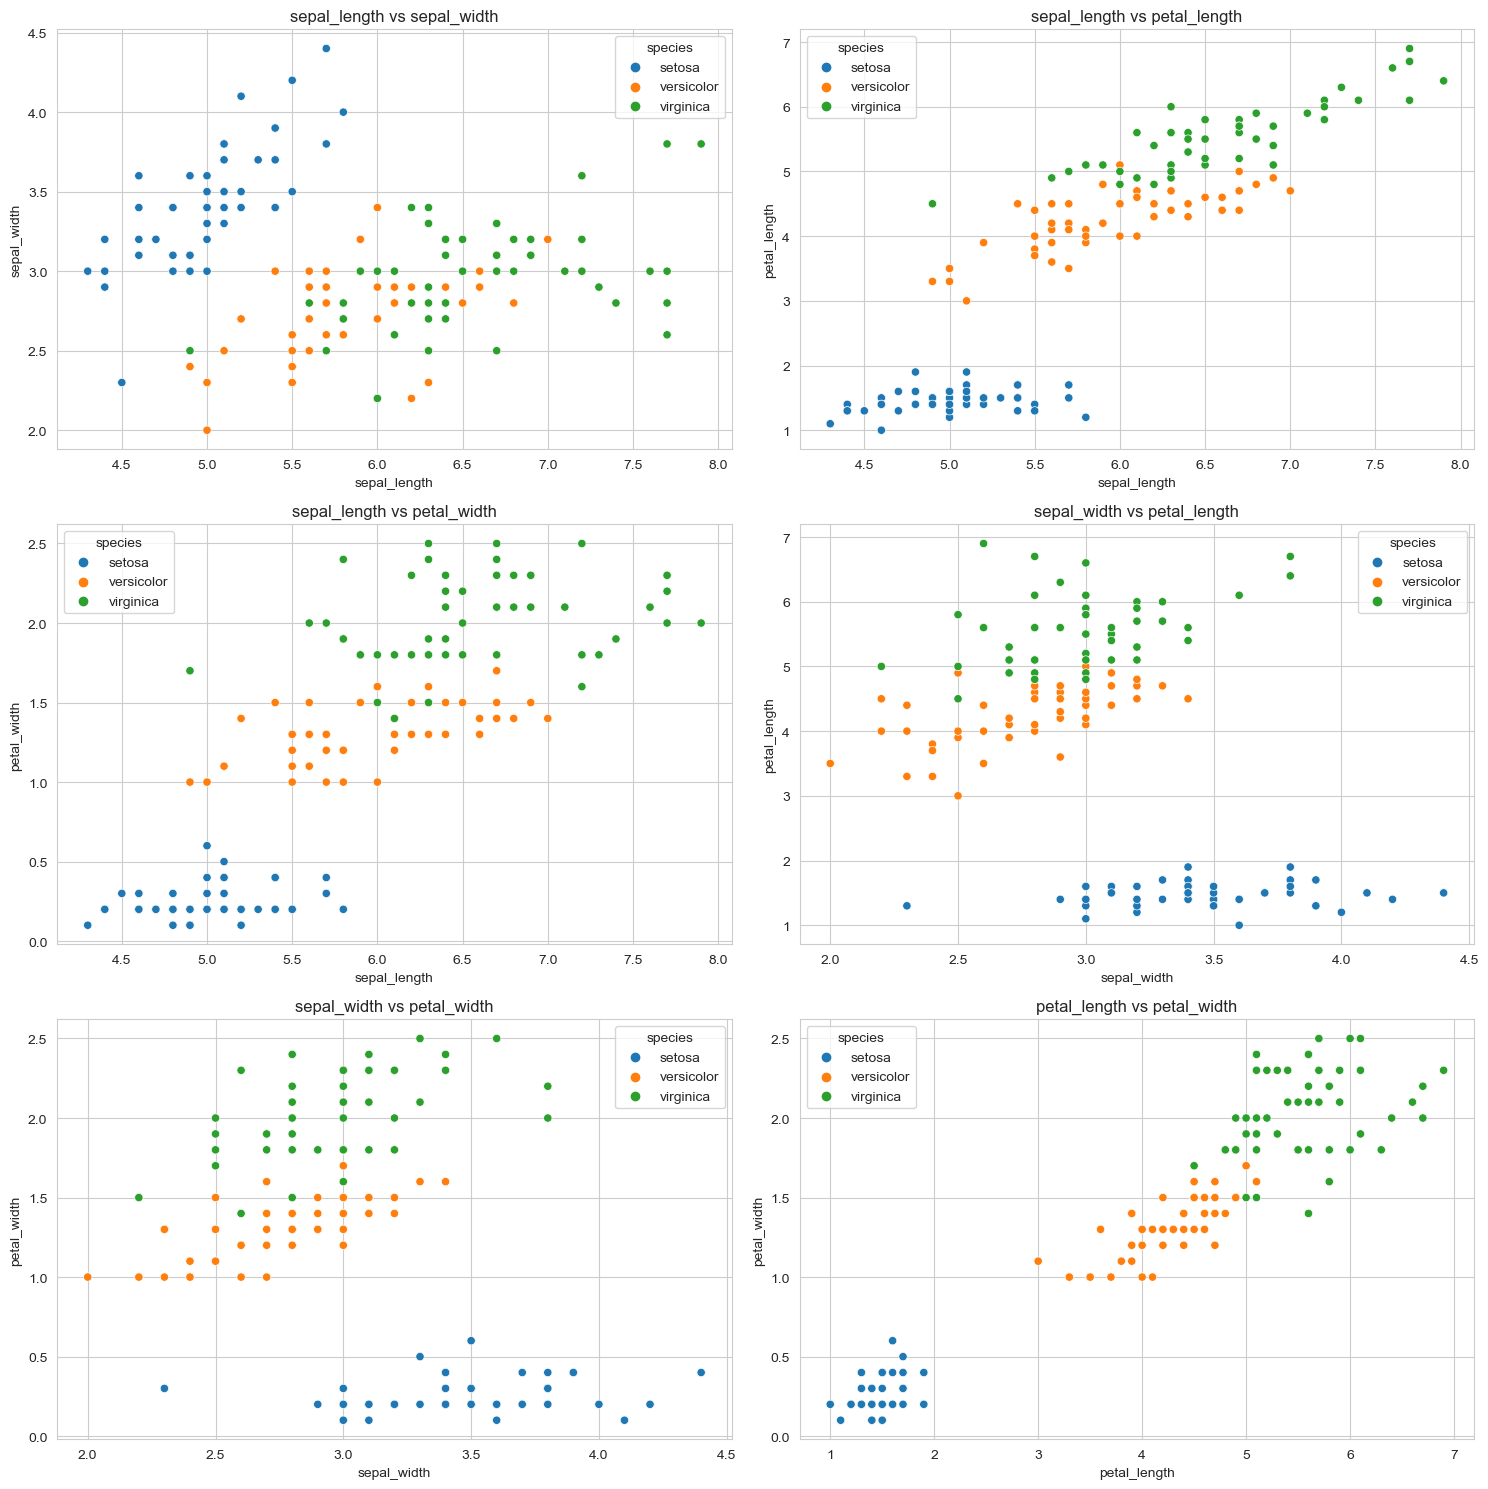

In [34]:
# Selecting only numerical columns
numerical_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Creating unique scatter plots
num_cols_count = len(numerical_columns)
num_plots = num_cols_count * (num_cols_count - 1) // 2

# Setting up subplots
fig, axes = plt.subplots(num_plots // 2, 2, figsize=(15, 15))

plot_index = 0
for i in range(num_cols_count):
    for j in range(i+1, num_cols_count):
        row = plot_index // 2
        col = plot_index % 2

        # Scatter plot
        sns.scatterplot(x=numerical_columns[i], y=numerical_columns[j], hue=output_var,data=iris_df, ax=axes[row, col])
        axes[row, col].set_title(f'{numerical_columns[i]} vs {numerical_columns[j]}')

        plot_index += 1

plt.tight_layout()
plt.show()

## 9.3 Correaltion Numerical Columns

                sepal_length  sepal_width  petal_length  petal_width  \
sepal_length        1.000000    -0.117570      0.871754     0.817941   
sepal_width        -0.117570     1.000000     -0.428440    -0.366126   
petal_length        0.871754    -0.428440      1.000000     0.962865   
petal_width         0.817941    -0.366126      0.962865     1.000000   
species_labels      0.782561    -0.426658      0.949035     0.956547   

                species_labels  
sepal_length          0.782561  
sepal_width          -0.426658  
petal_length          0.949035  
petal_width           0.956547  
species_labels        1.000000  


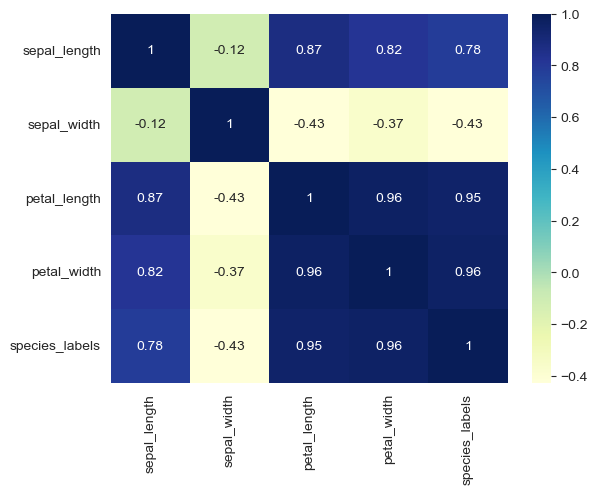

In [35]:
print(iris_df.corr(numeric_only=True))
sns.heatmap(iris_df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()

# 10. Data Transformation

# 11. Standization

In [36]:
scaler = StandardScaler()
mean_list = []
std_list = []
for var in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    mean_list.append(iris_df[var].mean())
    std_list.append(iris_df[var].std())
    
print(mean_list)
print(std_list)

# Fit and transform the scaler on the selected columns
scaled_columns = scaler.fit_transform(iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

# Replace the original columns with the scaled columns
iris_df[['sepal_length_stand', 'sepal_width_stand', 'petal_length_stand', 'petal_width_stand']] = scaled_columns

print(iris_df)

[5.843333333333334, 3.0573333333333337, 3.7580000000000005, 1.1993333333333336]
[0.8280661279778629, 0.435866284936698, 1.7652982332594667, 0.7622376689603465]
     sepal_length  sepal_width  petal_length  petal_width  species_labels  \
0             5.1          3.5           1.4          0.2               0   
1             4.9          3.0           1.4          0.2               0   
2             4.7          3.2           1.3          0.2               0   
3             4.6          3.1           1.5          0.2               0   
4             5.0          3.6           1.4          0.2               0   
..            ...          ...           ...          ...             ...   
145           6.7          3.0           5.2          2.3               2   
146           6.3          2.5           5.0          1.9               2   
147           6.5          3.0           5.2          2.0               2   
148           6.2          3.4           5.4          2.3             

# 12. Convert Cat - to - Numerical Columns

# ML Models

In [37]:
Y=iris_df["species_labels"]
X=iris_df[['sepal_length_stand', 'sepal_width_stand', 'petal_length_stand', 'petal_width_stand']]
print(len(Y),len(X))

150 150


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)
print(len(X_train),len(X_test))

120 30


In [39]:
def draw_heatmap(conf_matrix):
    sns.heatmap(conf_matrix, annot=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix')
    plt.show()

## Logistic Regression 

Model - Logistic Regression
accuracy train score overall : 0.9666666666666667
accuracy test score overall : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


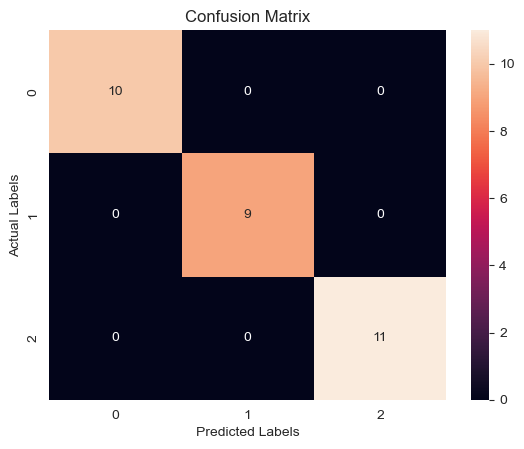

In [40]:
lg_model = LogisticRegression(solver='saga', max_iter=500, random_state=42)
lg_model.fit(X_train, Y_train)

print("Model - Logistic Regression")
score = lg_model.score(X_train, Y_train)
print('accuracy train score overall :', score)
score = lg_model.score(X_test, Y_test)
print('accuracy test score overall :', score)

y_pred = lg_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GaussianNB

Model-GaussianNB
train score 0.95
test score 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


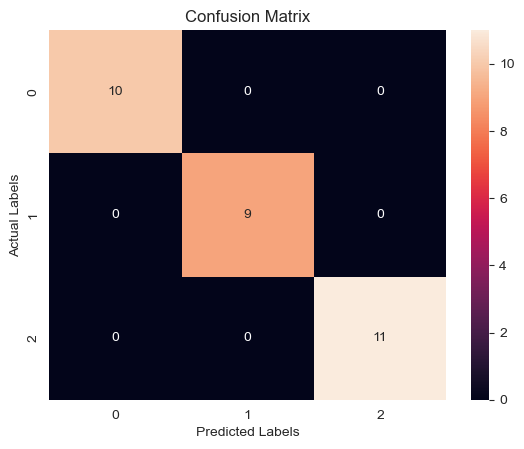

In [41]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB
gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

print("Model-GaussianNB")
print("train score",gnb_model.score(X_train,Y_train))
print("test score",gnb_model.score(X_test,Y_test))

y_pred = gnb_model.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

### Save the model

In [42]:
import pickle
pickle.dump(gnb_model, open('iris-model.pkl', 'wb'))

# Suport Vector Machine - Classifier

model-Suport Vector Machine - kernel - linear -Classifier
Train Accuracy: 0.9833333333333333
Test Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


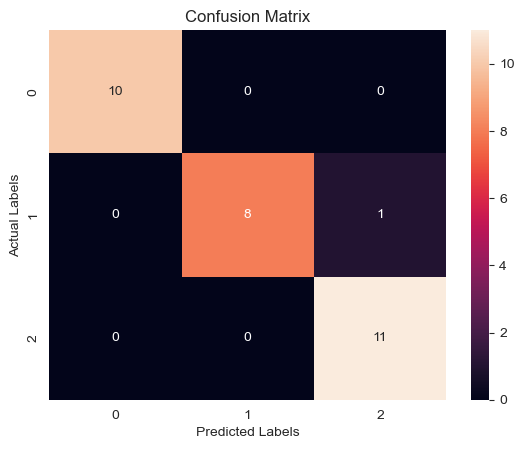

In [43]:
from sklearn.svm import SVC
# Initialize the SVM classifier
svm_linear_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_linear_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - kernel - linear -Classifier")

y_pred = svm_linear_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_linear_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -rbf - Classifier
Train Accuracy: 0.975
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


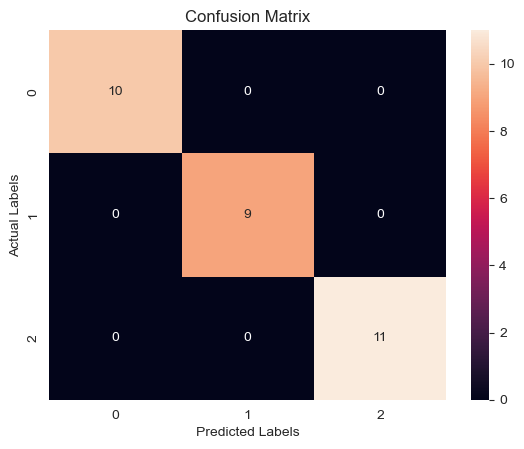

In [44]:
svm_rbf_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_rbf_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -rbf - Classifier")
y_pred = svm_rbf_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_rbf_classifier.predict(X_test)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

model-Suport Vector Machine - Kernel -poly - Classifier
Train Accuracy: 0.9333333333333333
Test Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]


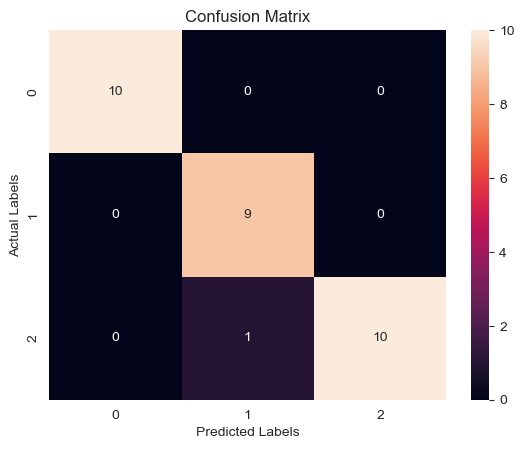

In [45]:
svm_poly_classifier = SVC(kernel='poly', random_state=42)

# Train the SVM classifier
svm_poly_classifier.fit(X_train, Y_train)
print("model-Suport Vector Machine - Kernel -poly - Classifier")

y_pred = svm_poly_classifier.predict(X_train)
# Calculate the accuracy of the model
accuracy = accuracy_score(Y_train, y_pred)
print("Train Accuracy:", accuracy)

# Predict the classes for test set
y_pred = svm_poly_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Decision Tree

Model-Decion Tree
train score: 1.0
test score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


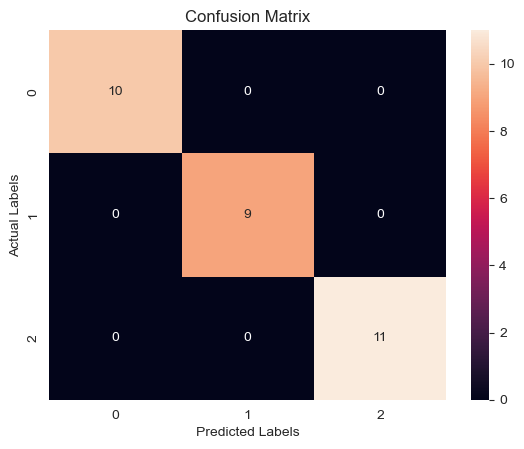

In [46]:
dt_clf = DecisionTreeClassifier(max_leaf_nodes=20,random_state=42)
dt_clf.fit(X_train, Y_train)
print("Model-Decion Tree")

accuracy=dt_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=dt_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=dt_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## Random Forest

Model- Random Forest Tree
train score: 1.0
test score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


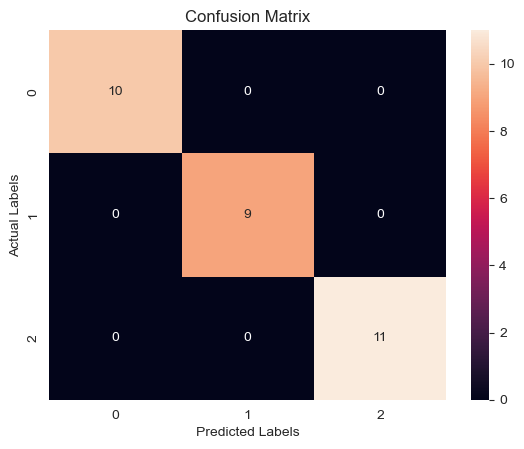

In [47]:
rf_clf= RandomForestClassifier(n_estimators = 1000, random_state = 42, max_leaf_nodes=20)
rf_clf.fit(X_train, Y_train)
print("Model- Random Forest Tree")

accuracy=rf_clf.score(X_train, Y_train)
print(f"train score: {accuracy}")

accuracy=rf_clf.score(X_test, Y_test)
print(f"test score: {accuracy}")

y_pred=rf_clf.predict(X_test)
print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## AdaBoost 

C:\Users\91956\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Model-AdaBoost
train score 0.9666666666666667
test score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


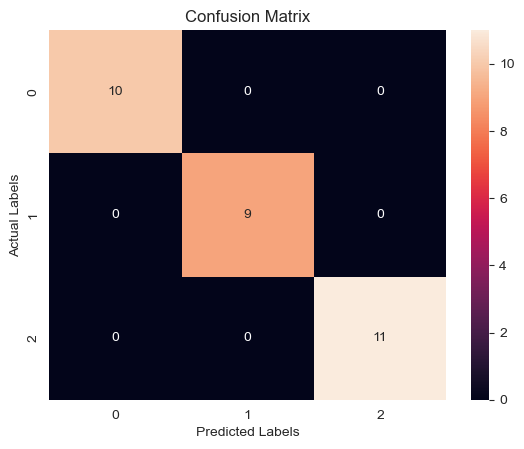

In [48]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_clf = AdaBoostClassifier( n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, Y_train)

print("Model-AdaBoost")
print("train score",adaboost_clf.score(X_train, Y_train))

# Predict on the test set
y_pred = adaboost_clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f"test score: {accuracy}")

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## GradientBoostingClassifier

model-Gradient Boosting Classifier
Train Accuracy: 0.9583333333333334
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


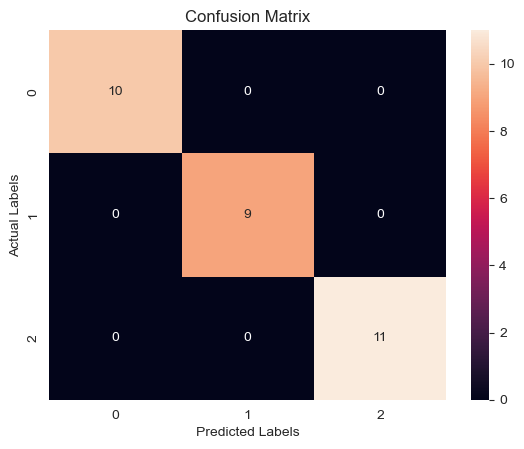

In [49]:
gdb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=0.1, max_depth=1, random_state=42)
gdb_clf.fit(X_train, Y_train)
print("model-Gradient Boosting Classifier")

accuracy = gdb_clf.score(X_train, Y_train)
print("Train Accuracy:", accuracy)

accuracy = gdb_clf.score(X_test, Y_test)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)

## XGBClassifier

model- XGB Classifier
Test Accuracy: 1.0
Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


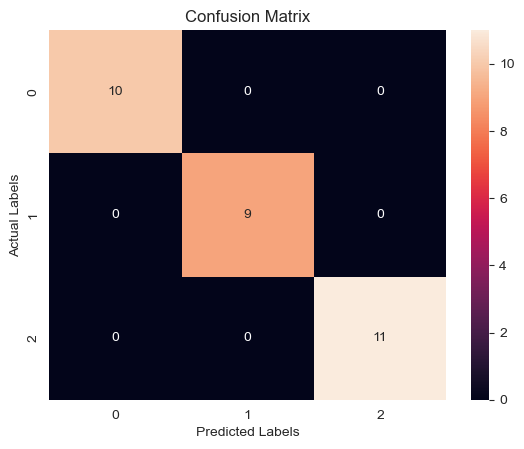

In [50]:
from xgboost import XGBClassifier
xgmodel = XGBClassifier()
xgmodel.fit(X_train, Y_train)


print("model- XGB Classifier")
# Make predictions on the test set
y_pred = xgmodel.predict(X_train)
accuracy = accuracy_score(Y_train, y_pred)
print("Test Accuracy:", accuracy)
# Evaluate the model

# Make predictions on the test set
y_pred = xgmodel.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy)

print(classification_report(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
conf_matrix = confusion_matrix(Y_test, y_pred)
draw_heatmap(conf_matrix)